In [11]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd,base64, io
%matplotlib inline
connection = sqlite3.connect('database.db')
pd.set_option('display.max_rows', 500)

def display_image(row, image_data):
    decoded_image = io.BytesIO(base64.b64decode(row[image_data]))
    img = plt.imread(decoded_image, format='png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f"{row['architecture']} ({row['configuration_id']})", fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()

## Show melanoma statistics

In [2]:
df = pd.read_sql_query("""
    SELECT nb.name, nb.accuracy, nb.loss, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.type = 'Melanoma' AND nb.configuration_id > 14
    ORDER BY met.recall DESC;
""", connection)
df

name  accuracy         loss  precision  f1_score  \
0           resnetGANV4Std  0.849111    25.989305   0.350467  0.445104   
1           resnetGANV3Seg  0.865557  1025.127563   0.284000  0.380697   
2      xceptionGANV3MinMax  0.823867    20.421400   0.311628  0.396450   
3            convNextGANV3  0.879231    15.374818   0.488189  0.496000   
4      xceptionGANV4MinMax  0.857621    22.326580   0.401408  0.430189   
5     resnetGANV3SegMinMax  0.842991    23.739708   0.314607  0.372093   
6        resnetGANV3MinMax  0.866801    23.432995   0.413534  0.429687   
7         convnextGANV4Std  0.459744     7.301409   0.393939  0.407843   
8         convnextGANV3Seg  0.867374    10.778628   0.475728  0.433628   
9            convnextGANV4  0.854179    14.179653   0.393939  0.351351   
10  convnextGANV3SegMinMax  0.157391     5.384803   0.179245  0.226866   
11        xceptionGANV3Std  0.829222    21.412296   0.307692  0.300000   
12           xceptionGANV4  0.910403   746.359680   0.375000  0.312796   
13        xceptionGANV3Seg  0.921495   818.763794   0.409091  0.285714   
14           xceptionGANV3  0.912603   772.993408   0.419355  0.281081   
15          resnetGANV3Std  0.885733    24.103804   0.500000  0.280702   
16        convnextGANV3Std  0.508223     8.712954   0.564103  0.271605   
17  xceptionGANV3SegMinMax  0.801014    18.449224   0.262500  0.206897   
18        xceptionGANV4Std  0.874737    28.681000   0.760000  0.256757   
19       resnetGANV4MinMax  0.875215    26.090889   0.483871  0.194805   
20             resnetGANV4  0.924268   774.975342   0.600000  0.130435   
21             resnetGANV3  0.913559   829.412537   0.636364  0.104478   
22     convnextGANV3MinMax  0.120195     3.781379   0.277778  0.070922   
23     convnextGANV4MinMax  0.083668     7.904159   0.357143  0.072993   

     roc_auc    recall  specificity  
0   0.823234  0.609756     0.898614  
1   0.724722  0.577236     0.869438  
2   0.810153  0.544715     0.892050  
3   0.848233  0.504065     0.952589  
4   0.786554  0.463415     0.938001  
5   0.802966  0.455285     0.911014  
6   0.783871  0.447154     0.943107  
7   0.833953  0.422764     0.941648  
8   0.860259  0.398374     0.960613  
9   0.808718  0.317073     0.956236  
10  0.702449  0.308943     0.873085  
11  0.730435  0.292683     0.940919  
12  0.619315  0.268293     0.959883  
13  0.598999  0.219512     0.971554  
14  0.608395  0.211382     0.973742  
15  0.683039  0.195122     0.982495  
16  0.841294  0.178862     0.987600  
17  0.730210  0.170732     0.956966  
18  0.654374  0.154472     0.995624  
19  0.689100  0.121951     0.988330  
20  0.534397  0.073171     0.995624  
21  0.531050  0.056911     0.997082  
22  0.668262  0.040650     0.990518  
23  0.657466  0.040650     0.993435

## Show notebooks statistics

In [3]:
df = pd.read_sql_query("""
    --SELECT nb.name, nb.accuracy, nb.loss, nb.auc, nb.recall, nb.precision
    SELECT nb.configuration_id, nb.architecture, nb.accuracy, nb.loss, nb.auc, nb.recall, nb.precision
    FROM notebook AS nb
    WHERE nb.configuration_id > 14
    ORDER BY nb.configuration_id
""", connection)
df

configuration_id architecture  accuracy         loss       auc    recall  \
0                 15     ConvNeXt  0.879231    15.374818  0.892624  0.807229   
1                 15     ResNetV2  0.913559   829.412537  0.829242  0.706158   
2                 15     Xception  0.912603   772.993408  0.826629  0.702142   
3                 16     ConvNeXt  0.120195     3.781379  0.883318  0.717537   
4                 16     ResNetV2  0.866801    23.432995  0.873880  0.775100   
5                 16     Xception  0.823867    20.421400  0.858980  0.745649   
6                 17     ConvNeXt  0.867374    10.778628  0.903145  0.821285   
7                 17     ResNetV2  0.865557  1025.127563  0.734402  0.544177   
8                 17     Xception  0.921495   818.763794  0.845348  0.734270   
9                 18     ConvNeXt  0.157391     5.384803  0.864615  0.680723   
10                18     ResNetV2  0.842991    23.739708  0.860501  0.753681   
11                18     Xception  0.801014    18.449224  0.859007  0.742303   
12                19     ConvNeXt  0.508223     8.712954  0.872902  0.757697   
13                19     ResNetV2  0.885733    24.103804  0.887430  0.801205   
14                19     Xception  0.829222    21.412296  0.860658  0.746319   
15                20     ConvNeXt  0.854179    14.179653  0.886232  0.792503   
16                20     ResNetV2  0.924268   774.975342  0.848141  0.739625   
17                20     Xception  0.910403   746.359680  0.824732  0.699464   
18                21     ConvNeXt  0.083668     7.904159  0.840180  0.720884   
19                21     ResNetV2  0.875215    26.090889  0.878208  0.787818   
20                21     Xception  0.857621    22.326580  0.872686  0.770415   
21                22     ConvNeXt  0.459744     7.301409  0.871064  0.738956   
22                22     ResNetV2  0.849111    25.989305  0.857318  0.745649   
23                22     Xception  0.874737    28.681000  0.866295  0.766399   

    precision  
0    0.807229  
1    0.706158  
2    0.702142  
3    0.721400  
4    0.775100  
5    0.745649  
6    0.821285  
7    0.544177  
8    0.734270  
9    0.682093  
10   0.754186  
11   0.742303  
12   0.758205  
13   0.801205  
14   0.746319  
15   0.792503  
16   0.739625  
17   0.699464  
18   0.720884  
19   0.787818  
20   0.770415  
21   0.739451  
22   0.745649  
23   0.766399

## Get confusion matrixes, accuracy and losses graphs

ConvNeXt(15)


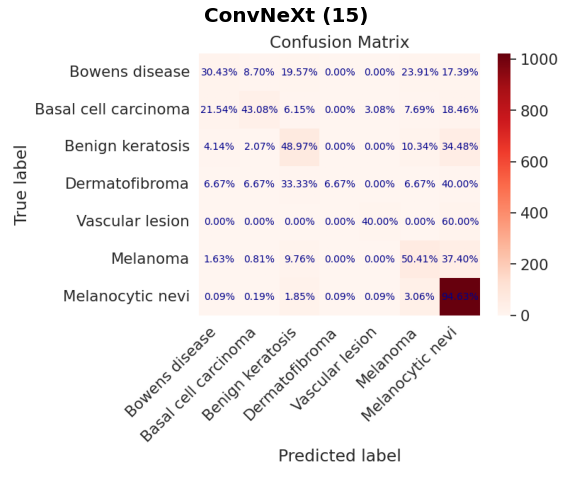

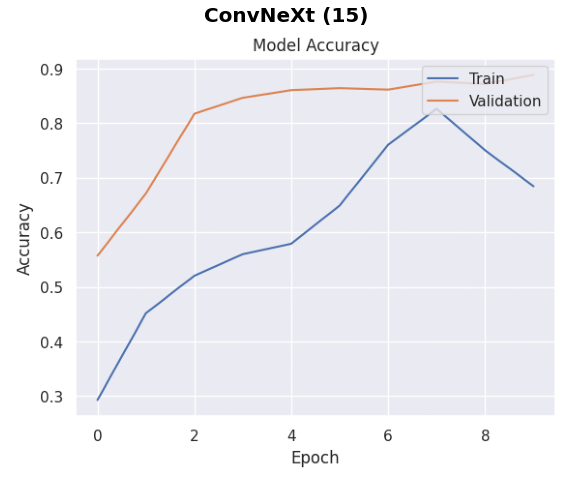

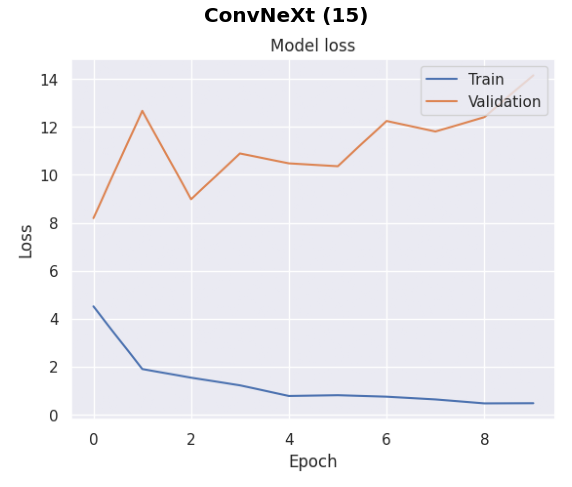

ResNetV2(15)


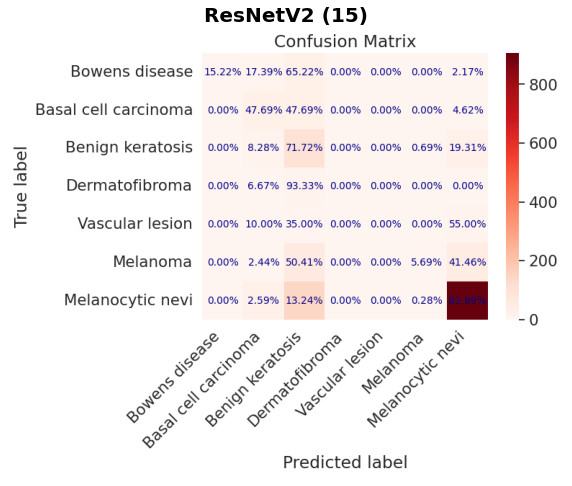

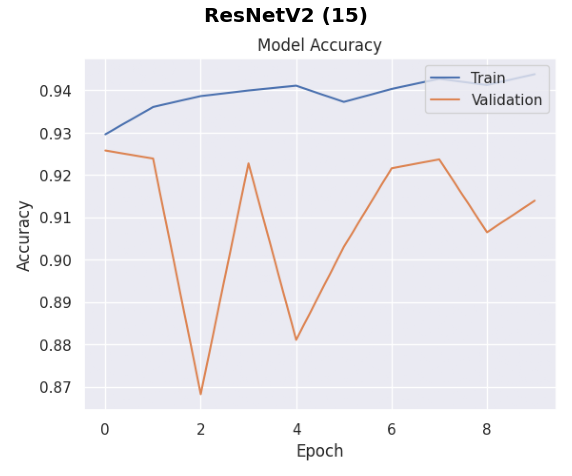

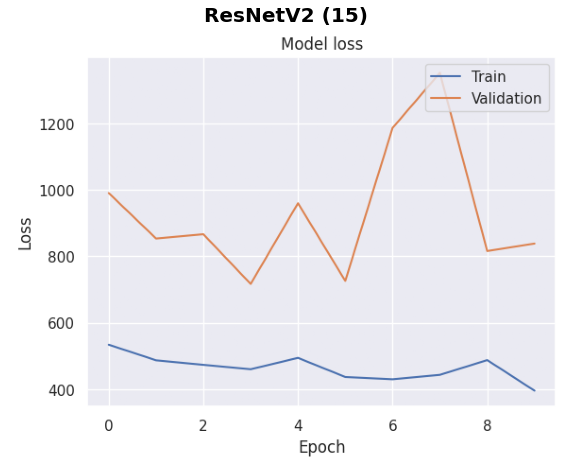

Xception(15)


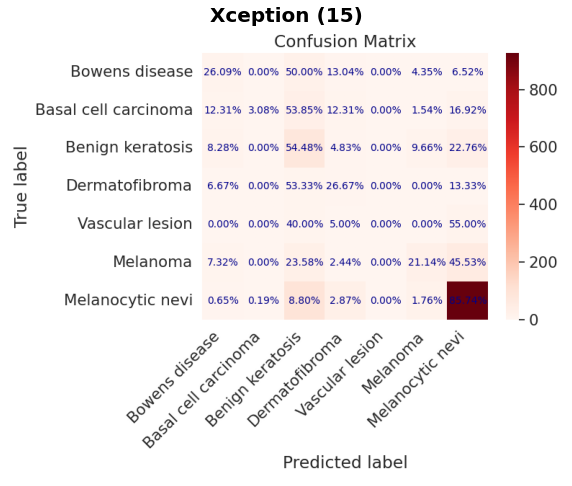

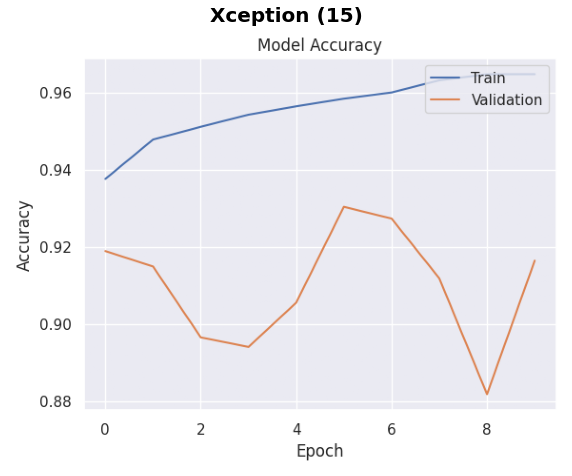

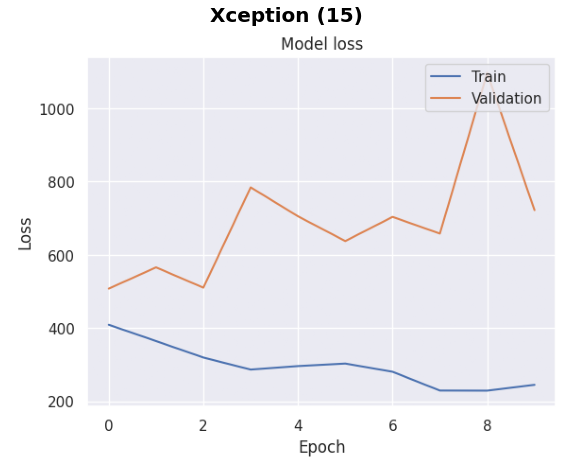

ConvNeXt(16)


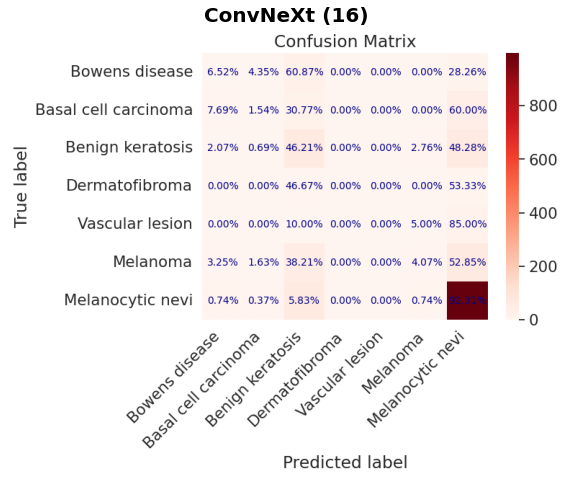

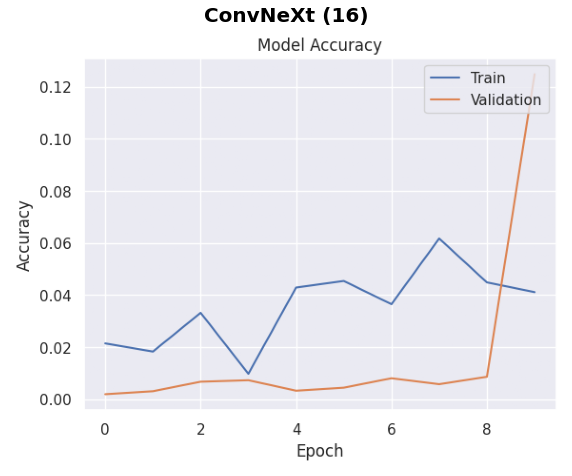

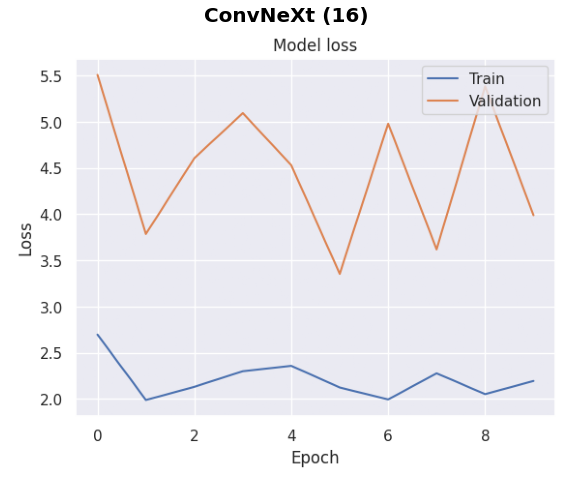

ResNetV2(16)


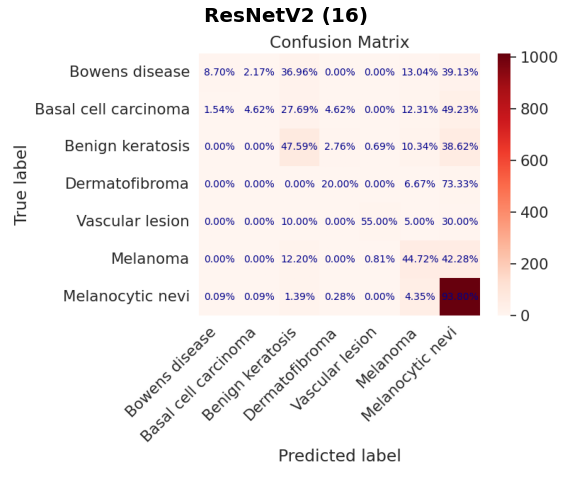

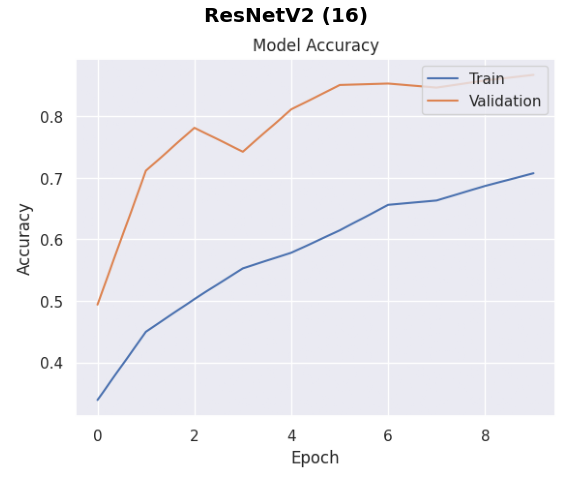

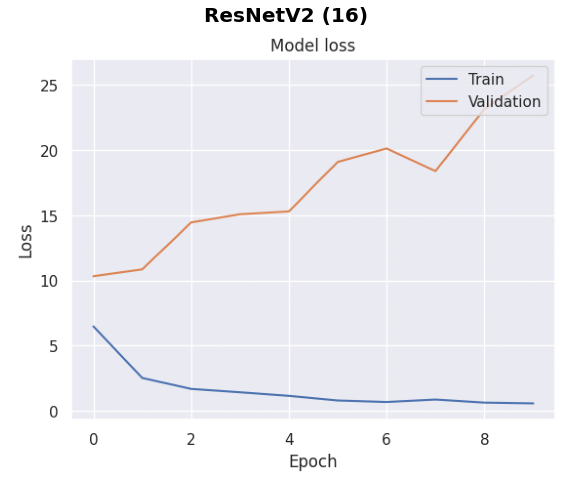

Xception(16)


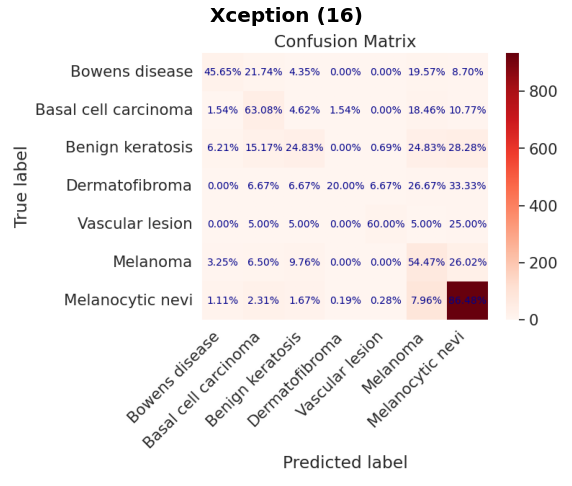

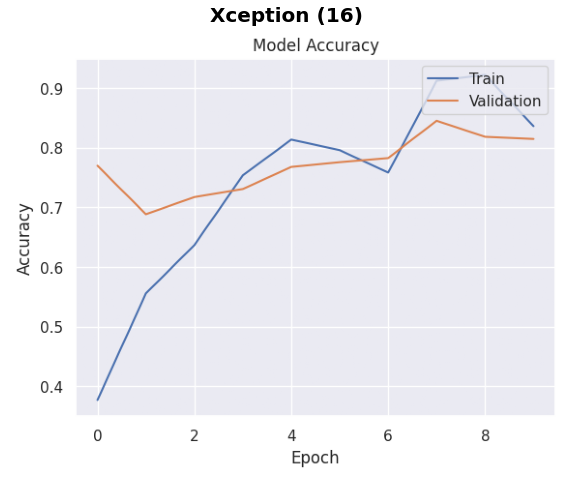

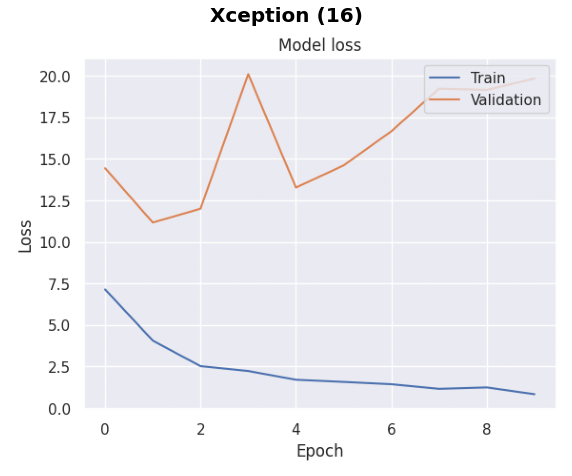

ConvNeXt(17)


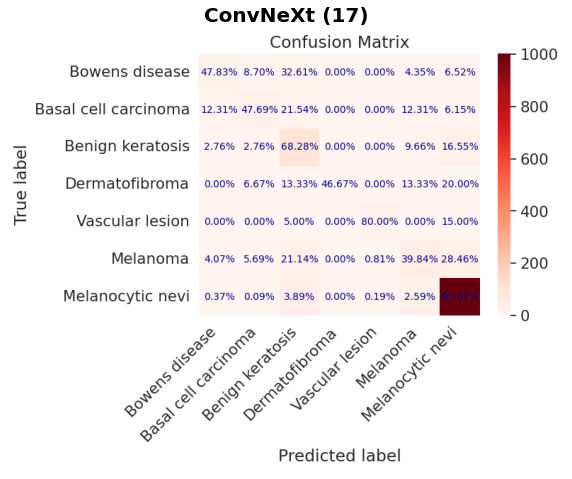

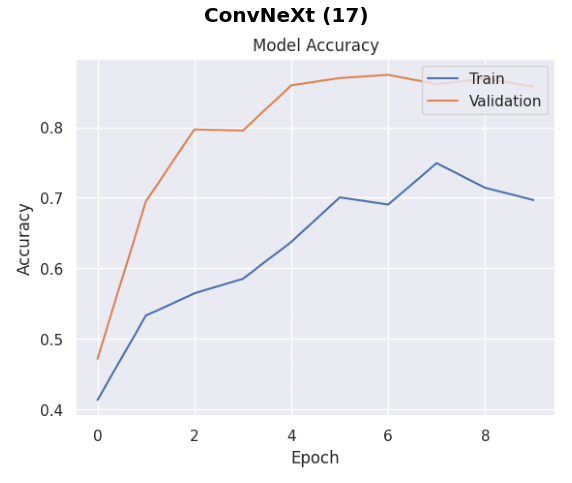

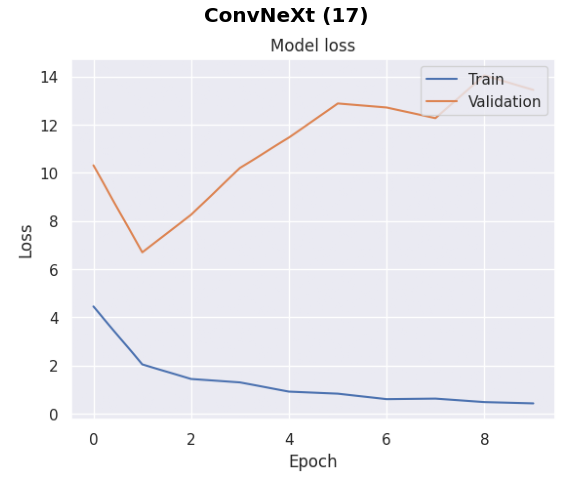

ResNetV2(17)


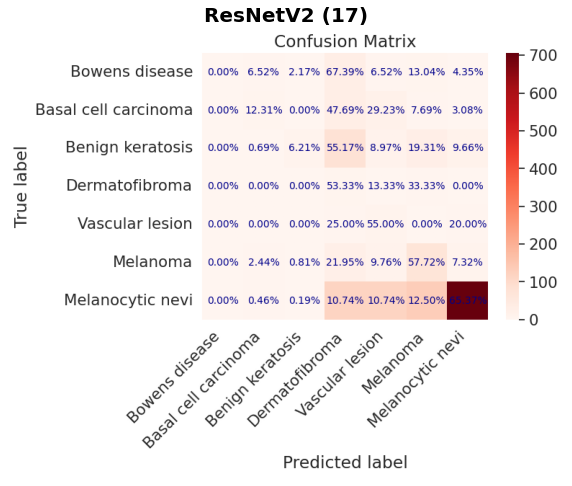

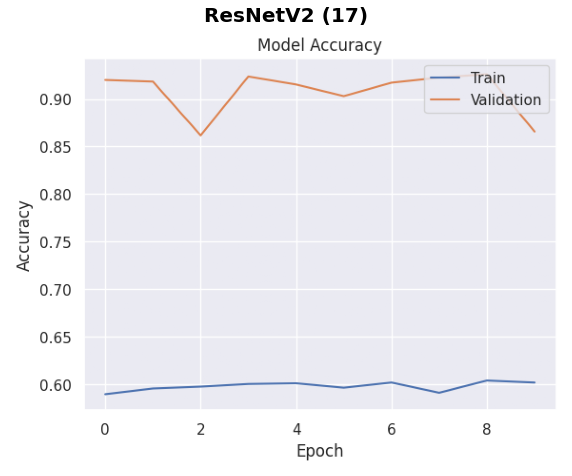

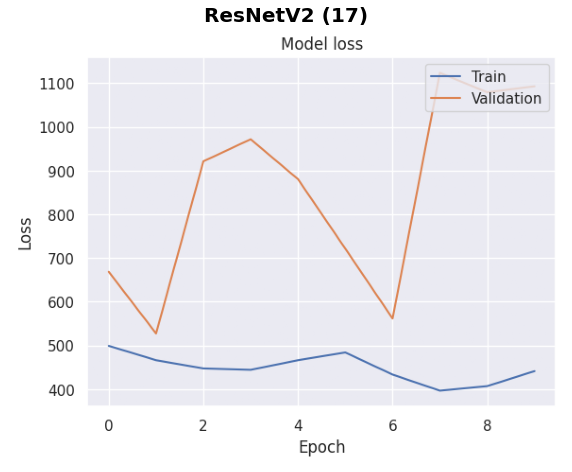

Xception(17)


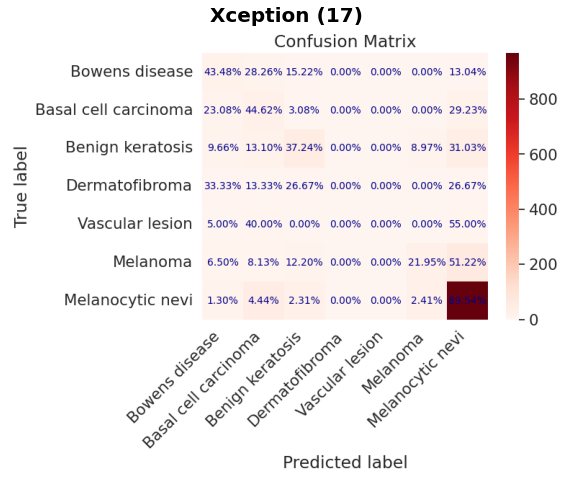

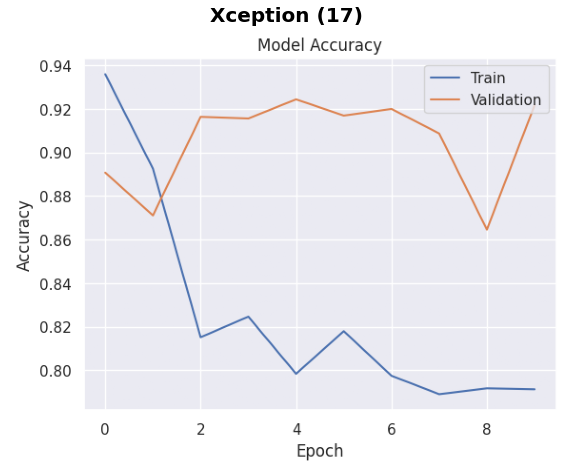

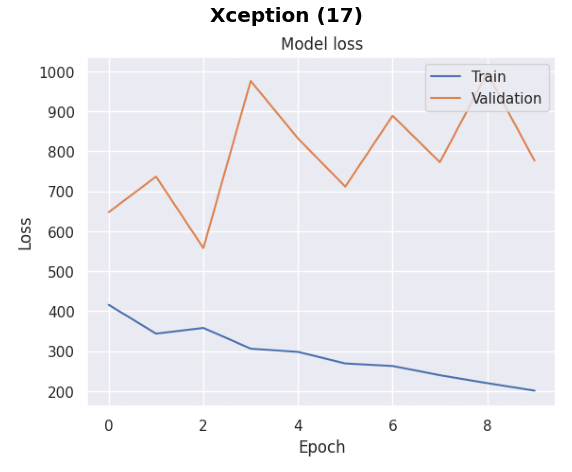

ConvNeXt(18)


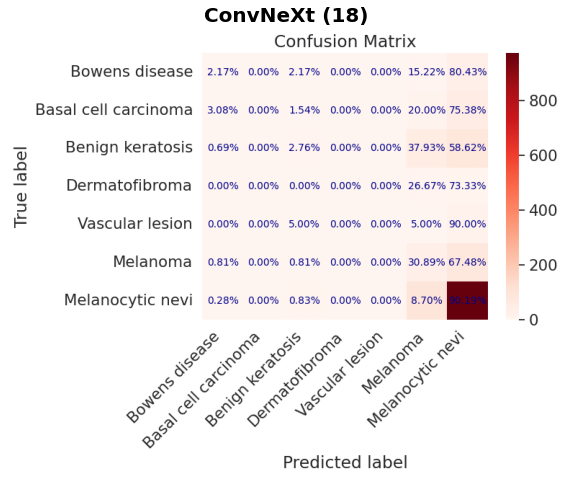

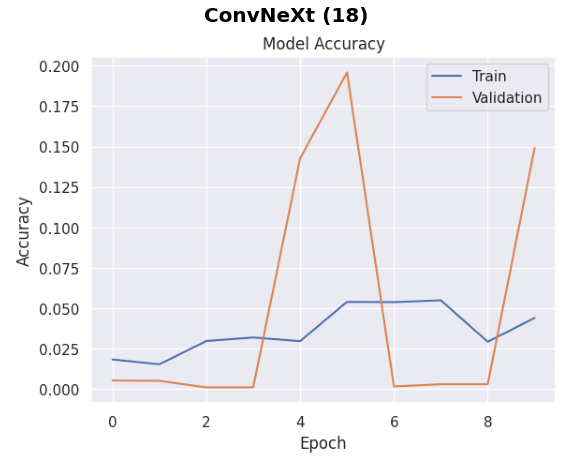

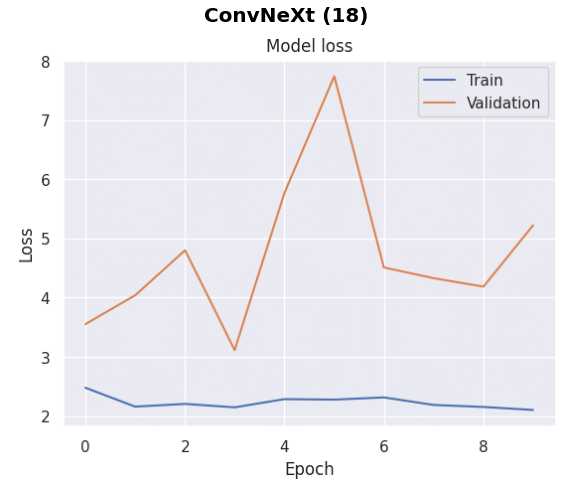

ResNetV2(18)


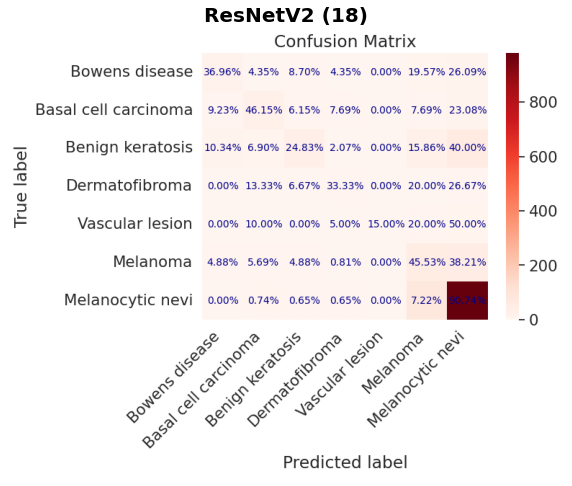

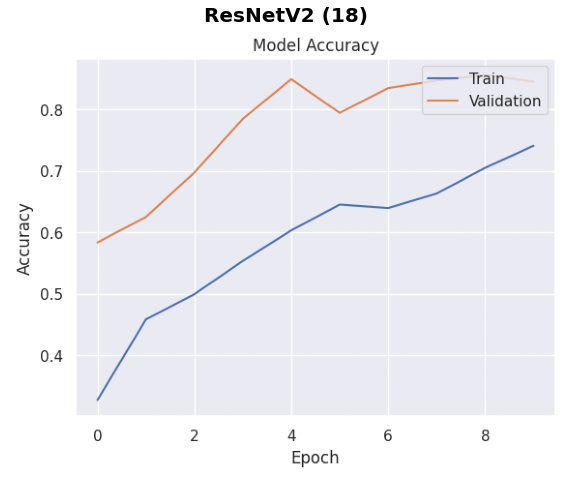

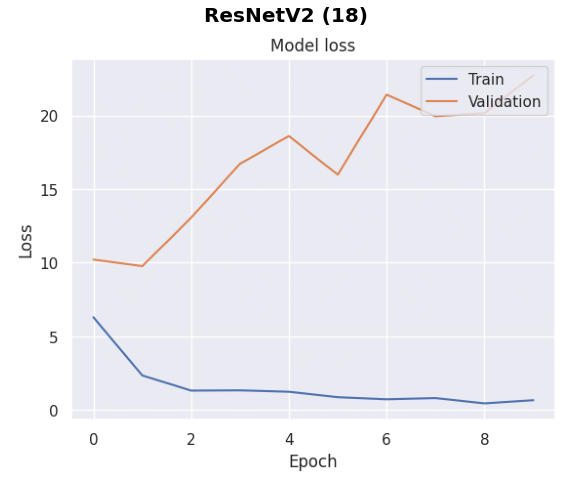

Xception(18)


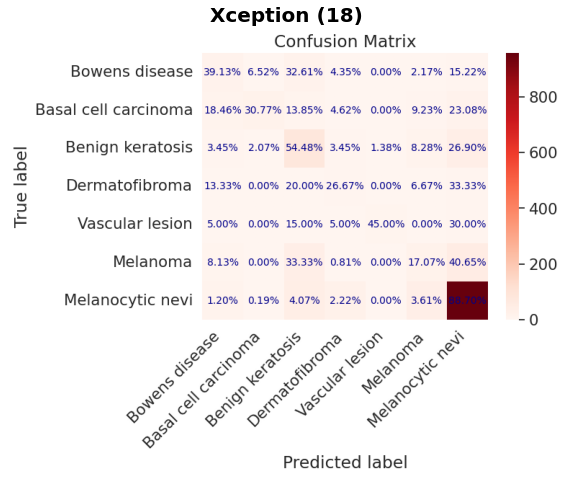

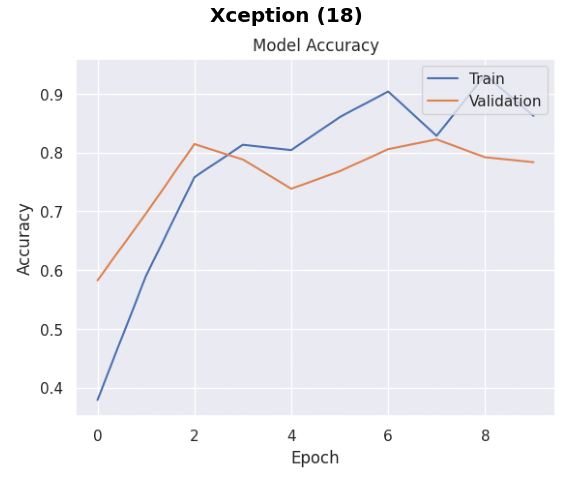

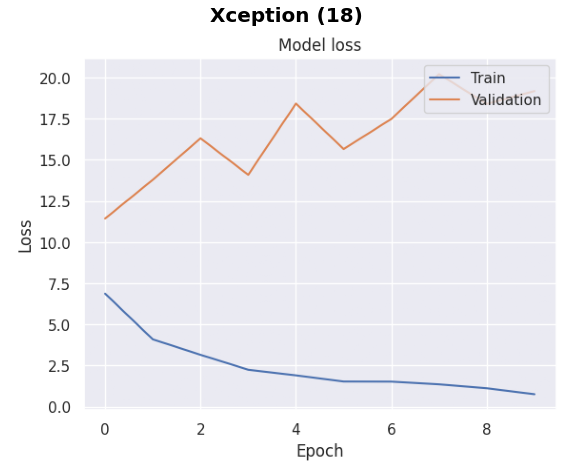

ConvNeXt(19)


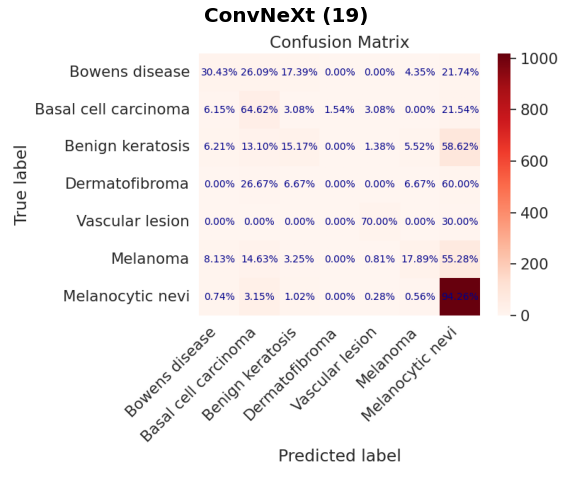

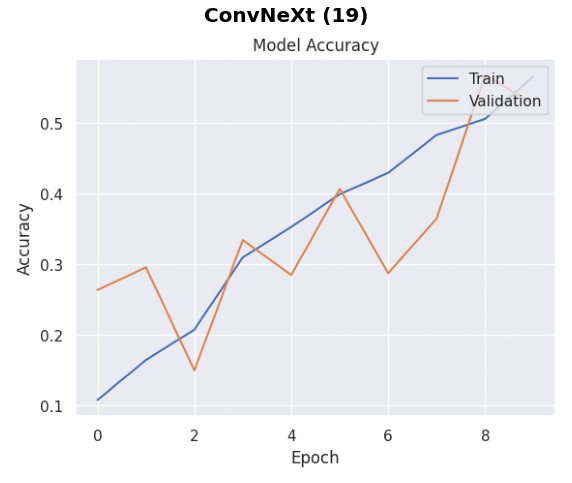

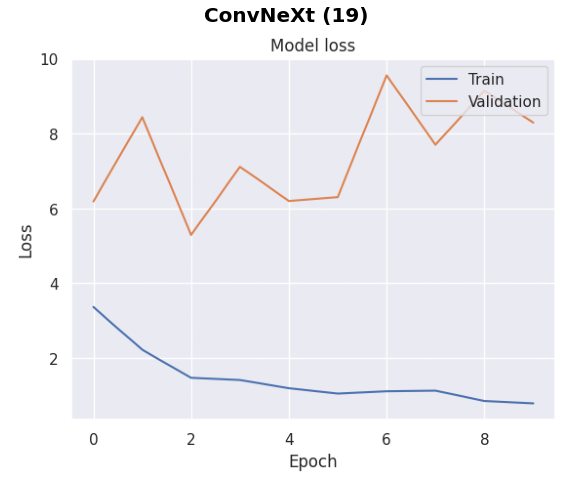

ResNetV2(19)


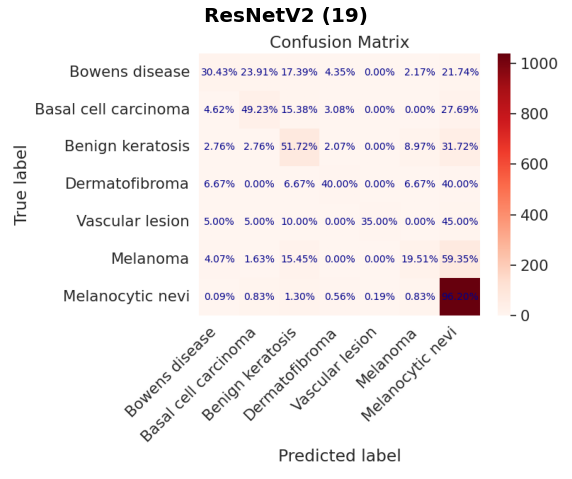

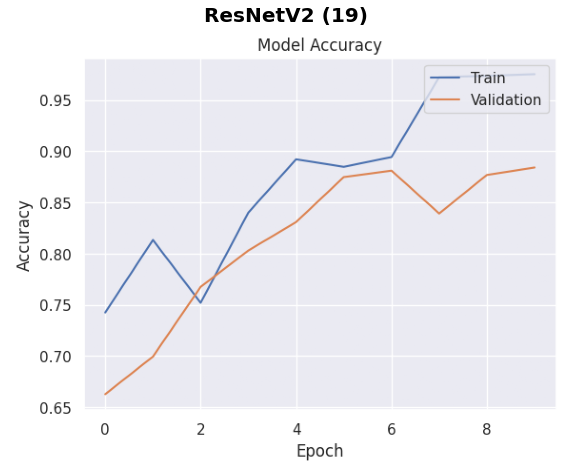

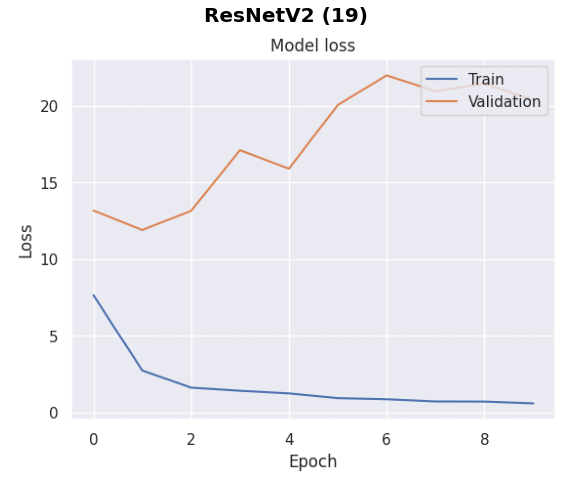

Xception(19)


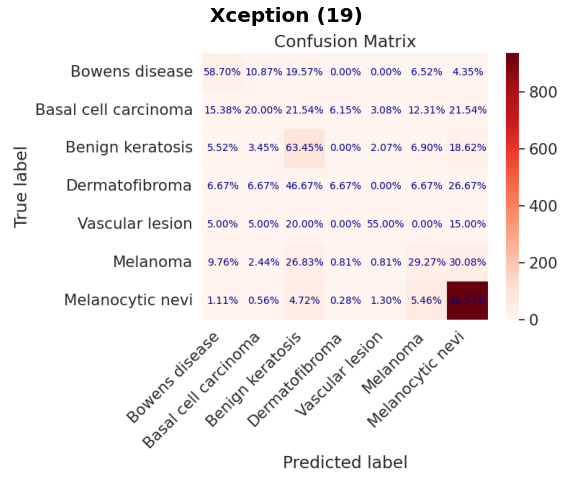

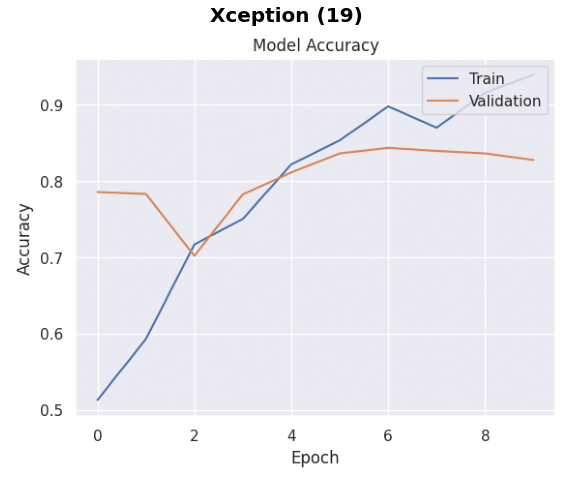

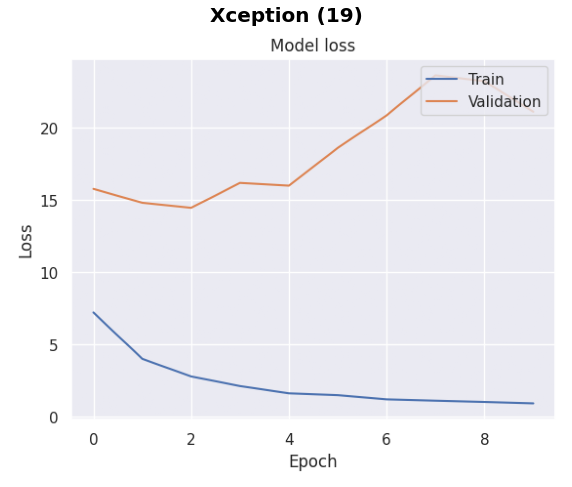

ConvNeXt(20)


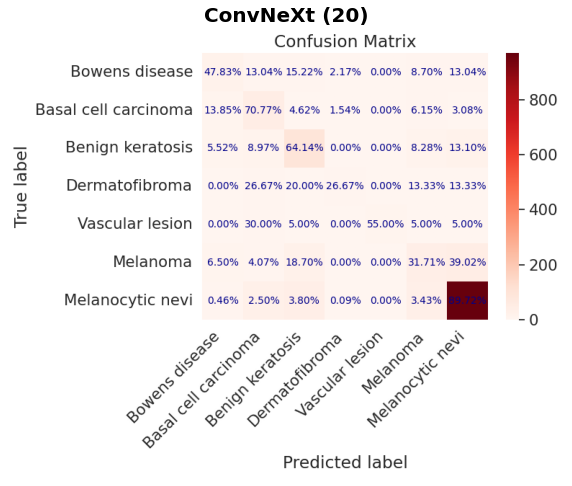

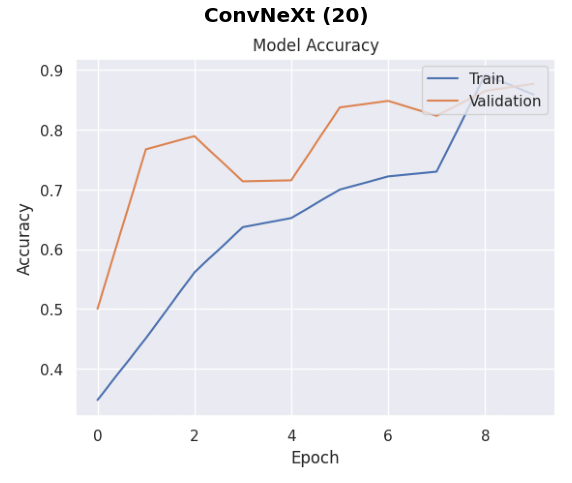

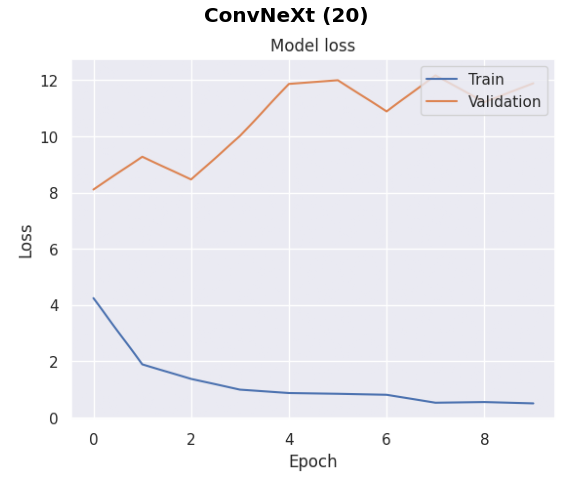

ResNetV2(20)


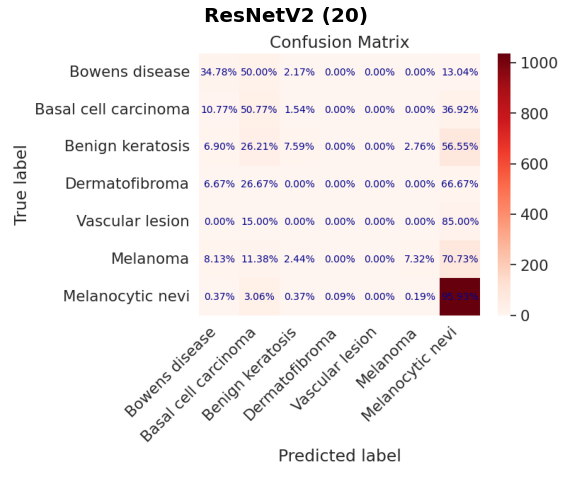

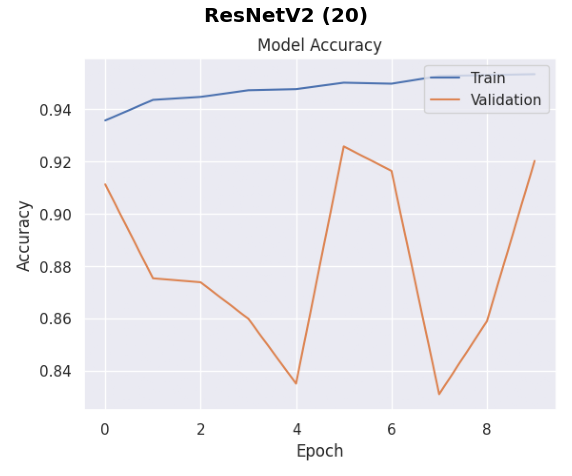

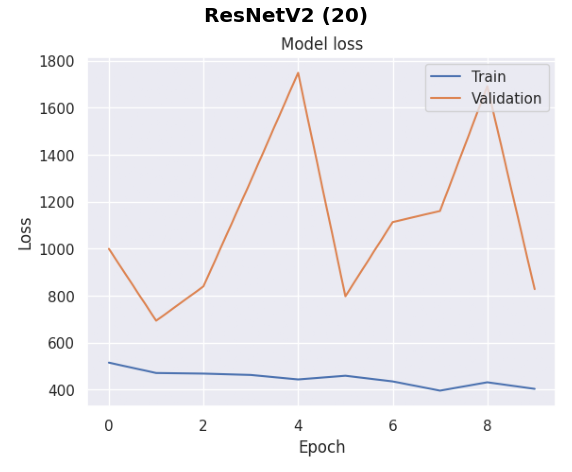

Xception(20)


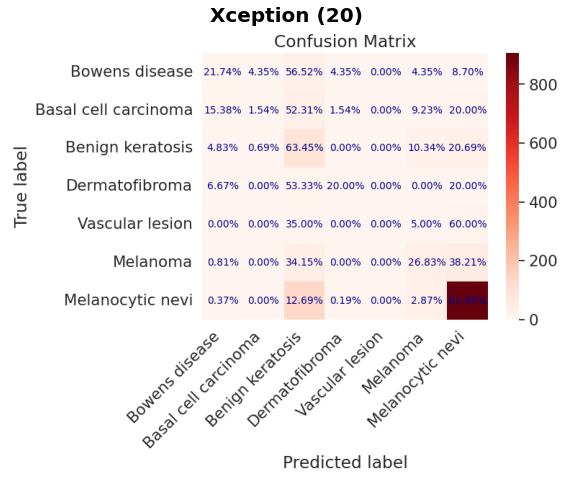

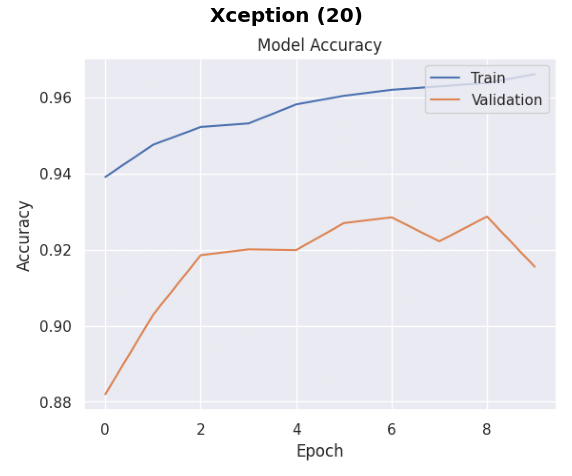

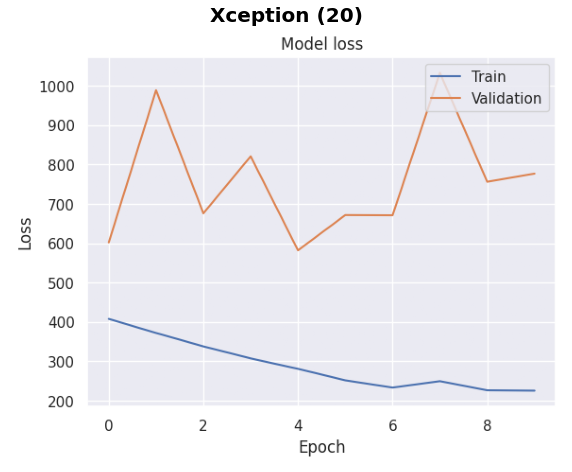

ConvNeXt(21)


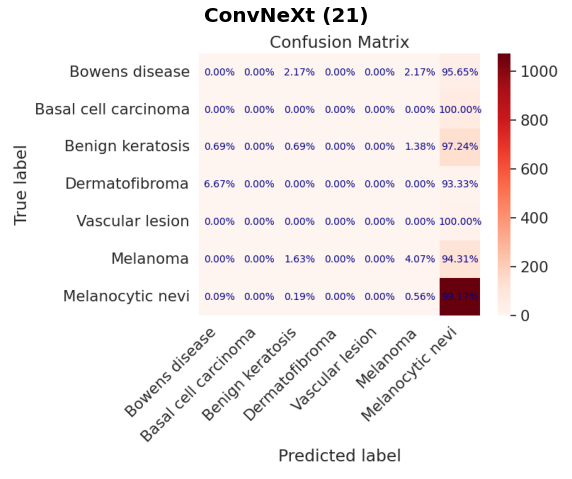

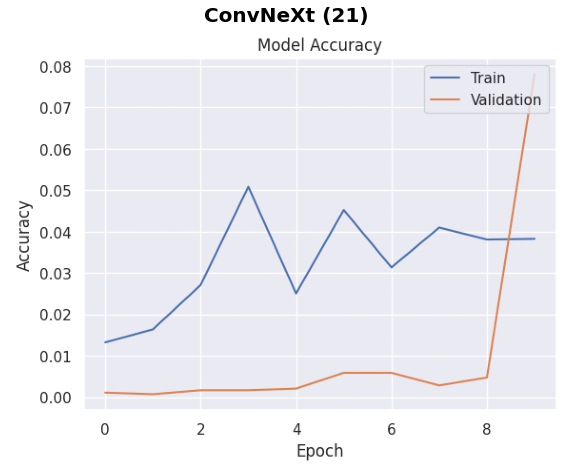

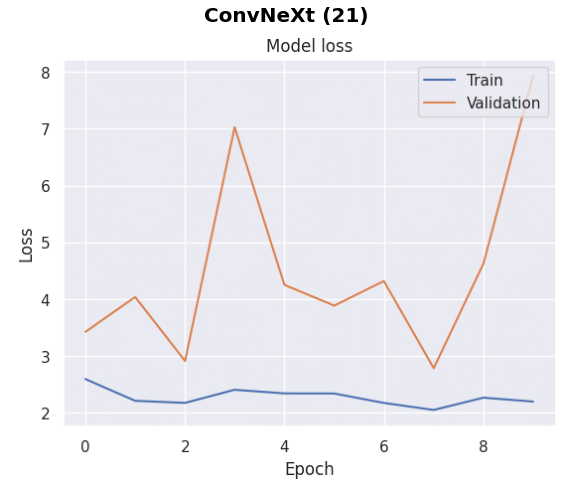

ResNetV2(21)


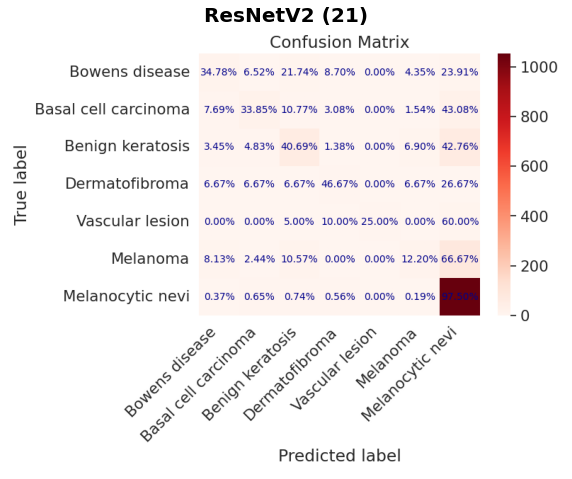

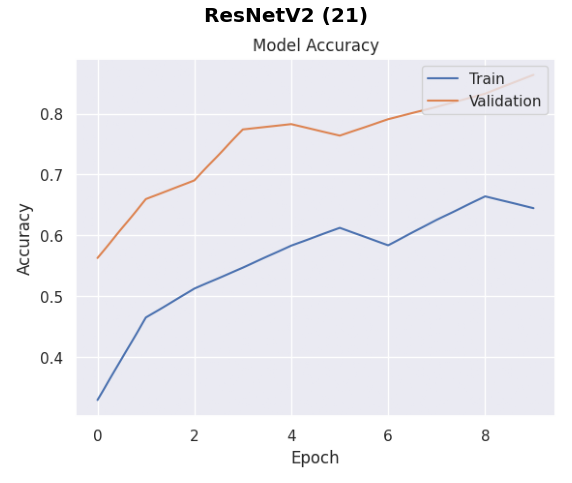

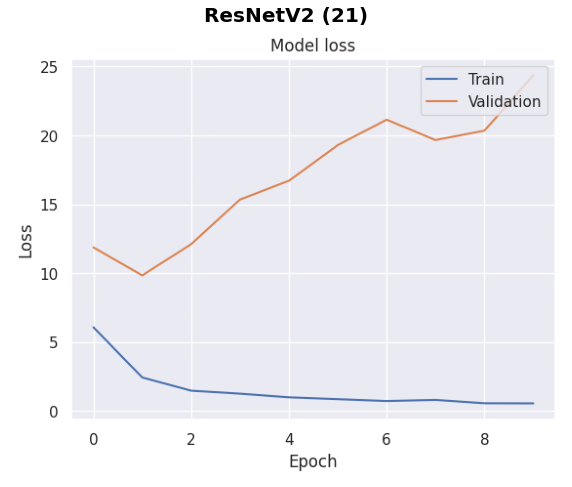

Xception(21)


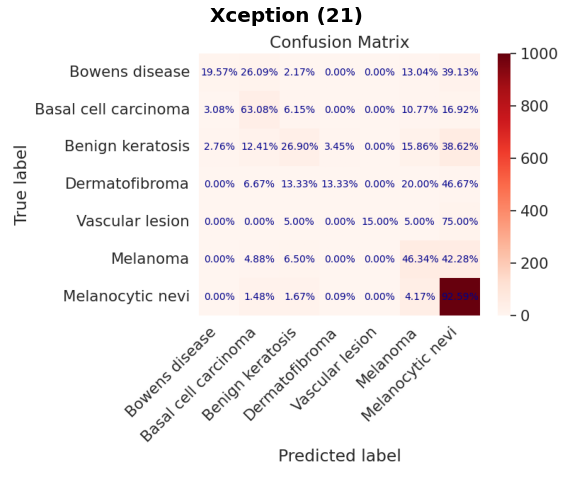

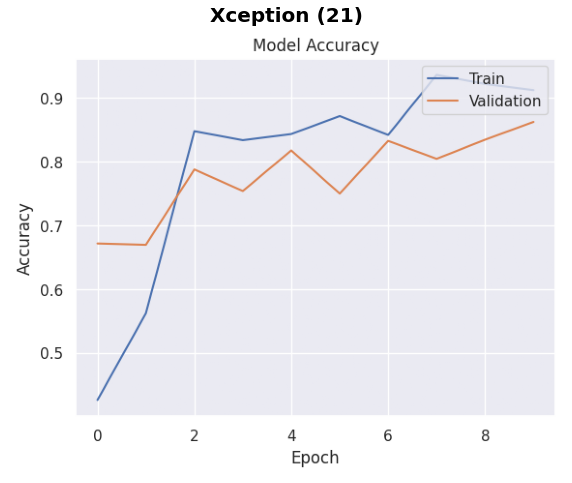

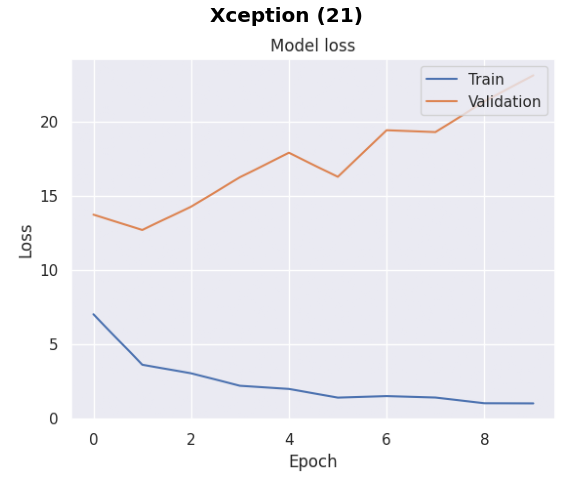

ConvNeXt(22)


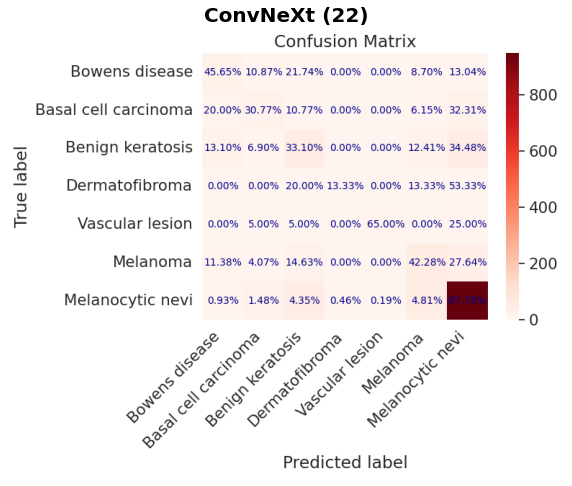

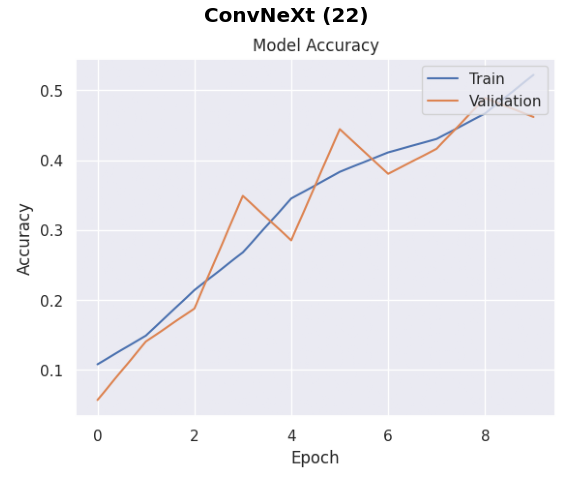

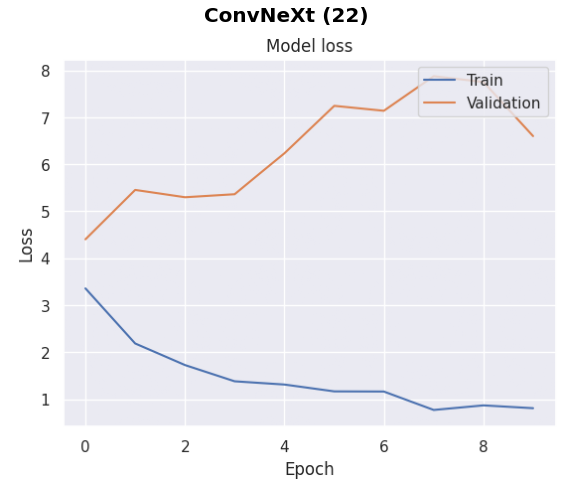

ResNetV2(22)


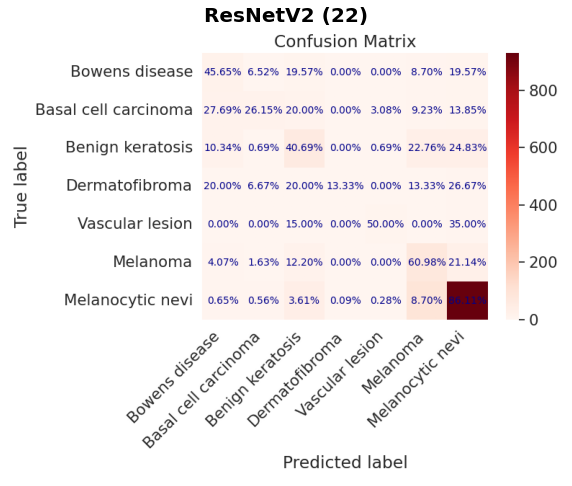

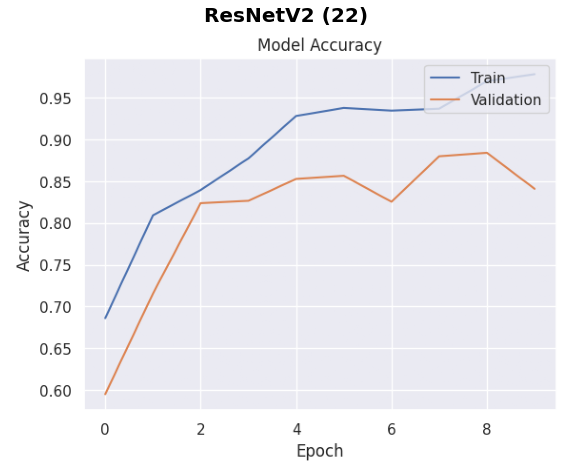

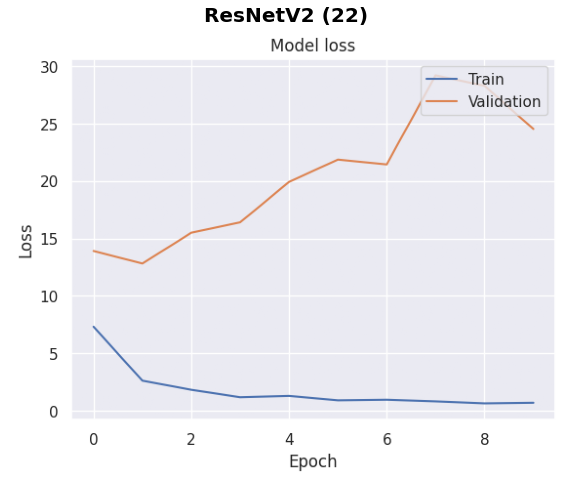

Xception(22)


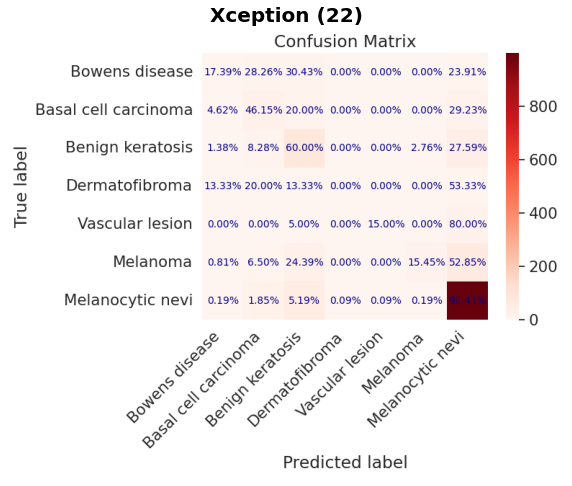

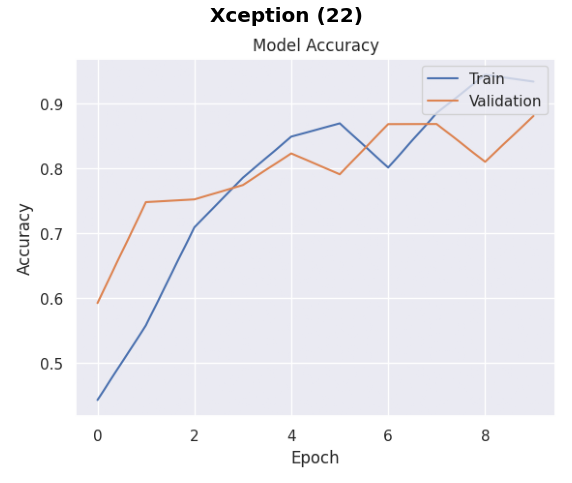

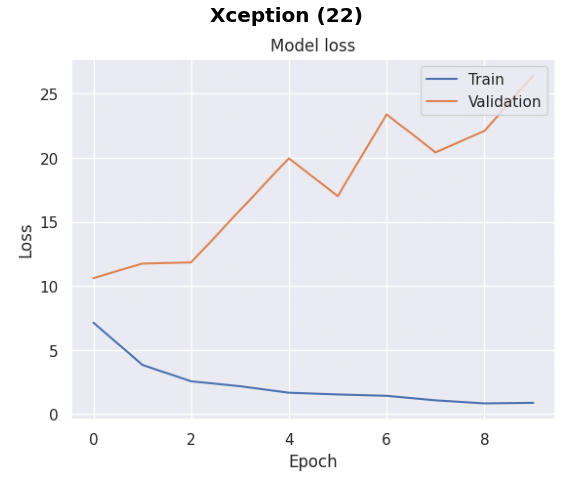

In [4]:
df = pd.read_sql_query("""
    SELECT nb.confusion_matrix, nb.accuracy_epochs, nb.loss_epochs, nb.configuration_id, nb.architecture
    FROM notebook AS nb
    WHERE nb.configuration_id > 14
""", connection)
for id, row in df.iterrows():
    print(''.join([row['architecture'], '(', str(row['configuration_id']), ')']))
    display_image(row,'confusion_matrix')
    display_image(row,'accuracy_epochs')
    display_image(row,'loss_epochs')

## Class count of notebooks with >50% in all class metrics and accuracy

In [5]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id ||')' as name, count(*) as total
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.precision > .5 and met.f1_score > .5 and met.roc_auc > .5 and met.specificity > .5 and met.recall > .5 and nb.accuracy > .5 and nb.configuration_id > 14
    group by nb.name
    ORDER BY count(*) DESC;
""", connection)
df

name  total
0   ConvNeXt (20)      3
1   Xception (16)      2
2   ResNetV2 (19)      2
3   ResNetV2 (16)      2
4   ConvNeXt (19)      2
5   ConvNeXt (17)      2
6   Xception (22)      1
7   Xception (21)      1
8   Xception (20)      1
9   Xception (19)      1
10  Xception (18)      1
11  Xception (17)      1
12  Xception (15)      1
13  ResNetV2 (22)      1
14  ResNetV2 (21)      1
15  ResNetV2 (18)      1
16  ResNetV2 (17)      1
17  ResNetV2 (15)      1
18  ConvNeXt (15)      1

## Data augmentation vs GANs
### 10 vs 16,18,21
Obs: Xception in configuration id 10 does not exist due to exceeded RAM limit

In [12]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (10,16,18,21) AND nb.architecture <> 'Xception'
    ORDER BY nb.architecture, met."type";
""", connection)
df

configuration_id architecture       loss  accuracy  precision    recall  \
0                 10     ConvNeXt   1.580292  0.000000   0.596026  0.060241   
1                 16     ConvNeXt   3.781379  0.120195   0.721400  0.717537   
2                 18     ConvNeXt   5.384803  0.157391   0.682093  0.680723   
3                 21     ConvNeXt   7.904159  0.083668   0.720884  0.720884   
4                 10     ConvNeXt   1.580292  0.000000   0.596026  0.060241   
5                 16     ConvNeXt   3.781379  0.120195   0.721400  0.717537   
6                 18     ConvNeXt   5.384803  0.157391   0.682093  0.680723   
7                 21     ConvNeXt   7.904159  0.083668   0.720884  0.720884   
8                 10     ConvNeXt   1.580292  0.000000   0.596026  0.060241   
9                 16     ConvNeXt   3.781379  0.120195   0.721400  0.717537   
10                18     ConvNeXt   5.384803  0.157391   0.682093  0.680723   
11                21     ConvNeXt   7.904159  0.083668   0.720884  0.720884   
12                10     ConvNeXt   1.580292  0.000000   0.596026  0.060241   
13                16     ConvNeXt   3.781379  0.120195   0.721400  0.717537   
14                18     ConvNeXt   5.384803  0.157391   0.682093  0.680723   
15                21     ConvNeXt   7.904159  0.083668   0.720884  0.720884   
16                10     ConvNeXt   1.580292  0.000000   0.596026  0.060241   
17                16     ConvNeXt   3.781379  0.120195   0.721400  0.717537   
18                18     ConvNeXt   5.384803  0.157391   0.682093  0.680723   
19                21     ConvNeXt   7.904159  0.083668   0.720884  0.720884   
20                10     ConvNeXt   1.580292  0.000000   0.596026  0.060241   
21                16     ConvNeXt   3.781379  0.120195   0.721400  0.717537   
22                18     ConvNeXt   5.384803  0.157391   0.682093  0.680723   
23                21     ConvNeXt   7.904159  0.083668   0.720884  0.720884   
24                10     ConvNeXt   1.580292  0.000000   0.596026  0.060241   
25                16     ConvNeXt   3.781379  0.120195   0.721400  0.717537   
26                18     ConvNeXt   5.384803  0.157391   0.682093  0.680723   
27                21     ConvNeXt   7.904159  0.083668   0.720884  0.720884   
28                10     ResNetV2   0.780098  0.000000   0.788167  0.722222   
29                16     ResNetV2  23.432995  0.866801   0.775100  0.775100   
30                18     ResNetV2  23.739708  0.842991   0.754186  0.753681   
31                21     ResNetV2  26.090889  0.875215   0.787818  0.787818   
32                10     ResNetV2   0.780098  0.000000   0.788167  0.722222   
33                16     ResNetV2  23.432995  0.866801   0.775100  0.775100   
34                18     ResNetV2  23.739708  0.842991   0.754186  0.753681   
35                21     ResNetV2  26.090889  0.875215   0.787818  0.787818   
36                10     ResNetV2   0.780098  0.000000   0.788167  0.722222   
37                16     ResNetV2  23.432995  0.866801   0.775100  0.775100   
38                18     ResNetV2  23.739708  0.842991   0.754186  0.753681   
39                21     ResNetV2  26.090889  0.875215   0.787818  0.787818   
40                10     ResNetV2   0.780098  0.000000   0.788167  0.722222   
41                16     ResNetV2  23.432995  0.866801   0.775100  0.775100   
42                18     ResNetV2  23.739708  0.842991   0.754186  0.753681   
43                21     ResNetV2  26.090889  0.875215   0.787818  0.787818   
44                10     ResNetV2   0.780098  0.000000   0.788167  0.722222   
45                16     ResNetV2  23.432995  0.866801   0.775100  0.775100   
46                18     ResNetV2  23.739708  0.842991   0.754186  0.753681   
47                21     ResNetV2  26.090889  0.875215   0.787818  0.787818   
48                10     ResNetV2   0.780098  0.000000   0.788167  0.722222   
49                16     ResNetV2  23.432995  0.866801

### 8 vs 15,20

In [13]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (8,15,20)
    ORDER BY nb.architecture, met."type";
""", connection)
df

configuration_id architecture        loss  accuracy  precision    recall  \
0                  8     ConvNeXt   13.903800  0.895391   0.842704  0.842704   
1                 15     ConvNeXt   15.374818  0.879231   0.807229  0.807229   
2                 20     ConvNeXt   14.179653  0.854179   0.792503  0.792503   
3                  8     ConvNeXt   13.903800  0.895391   0.842704  0.842704   
4                 15     ConvNeXt   15.374818  0.879231   0.807229  0.807229   
5                 20     ConvNeXt   14.179653  0.854179   0.792503  0.792503   
6                  8     ConvNeXt   13.903800  0.895391   0.842704  0.842704   
7                 15     ConvNeXt   15.374818  0.879231   0.807229  0.807229   
8                 20     ConvNeXt   14.179653  0.854179   0.792503  0.792503   
9                  8     ConvNeXt   13.903800  0.895391   0.842704  0.842704   
10                15     ConvNeXt   15.374818  0.879231   0.807229  0.807229   
11                20     ConvNeXt   14.179653  0.854179   0.792503  0.792503   
12                 8     ConvNeXt   13.903800  0.895391   0.842704  0.842704   
13                15     ConvNeXt   15.374818  0.879231   0.807229  0.807229   
14                20     ConvNeXt   14.179653  0.854179   0.792503  0.792503   
15                 8     ConvNeXt   13.903800  0.895391   0.842704  0.842704   
16                15     ConvNeXt   15.374818  0.879231   0.807229  0.807229   
17                20     ConvNeXt   14.179653  0.854179   0.792503  0.792503   
18                 8     ConvNeXt   13.903800  0.895391   0.842704  0.842704   
19                15     ConvNeXt   15.374818  0.879231   0.807229  0.807229   
20                20     ConvNeXt   14.179653  0.854179   0.792503  0.792503   
21                 8     ResNetV2  478.226196  0.926085   0.748996  0.748996   
22                15     ResNetV2  829.412537  0.913559   0.706158  0.706158   
23                20     ResNetV2  774.975342  0.924268   0.739625  0.739625   
24                 8     ResNetV2  478.226196  0.926085   0.748996  0.748996   
25                15     ResNetV2  829.412537  0.913559   0.706158  0.706158   
26                20     ResNetV2  774.975342  0.924268   0.739625  0.739625   
27                 8     ResNetV2  478.226196  0.926085   0.748996  0.748996   
28                15     ResNetV2  829.412537  0.913559   0.706158  0.706158   
29                20     ResNetV2  774.975342  0.924268   0.739625  0.739625   
30                 8     ResNetV2  478.226196  0.926085   0.748996  0.748996   
31                15     ResNetV2  829.412537  0.913559   0.706158  0.706158   
32                20     ResNetV2  774.975342  0.924268   0.739625  0.739625   
33                 8     ResNetV2  478.226196  0.926085   0.748996  0.748996   
34                15     ResNetV2  829.412537  0.913559   0.706158  0.706158   
35                20     ResNetV2  774.975342  0.924268   0.739625  0.739625   
36                 8     ResNetV2  478.226196  0.926085   0.748996  0.748996   
37                15     ResNetV2  829.412537  0.913559   0.706158  0.706158   
38                20     ResNetV2  774.975342  0.924268   0.739625  0.739625   
39                 8     ResNetV2  478.226196  0.926085   0.748996  0.748996   
40                15     ResNetV2  829.412537  0.913559   0.706158  0.706158   
41                20     ResNetV2  774.975342  0.924268   0.739625  0.739625   
42                 8     Xception  691.574402  0.910690   0.695448  0.695448   
43                15     Xception  772.993408  0.912603   0.702142  0.702142   
44                20     Xception  746.359680  0.910403   0.699464  0.699464   
45                 8     Xception  691.574402  0.910690   0.695448  0.695448   
46                15     Xception  772.993408  0.912603   0.702142  0.702142   
47                20     Xception  746.359680  0.910403   0.699464  0.699464   
48                 8     Xception  691.574402  0.910690   0.695448  0.695448   
49  

### 17 vs 1

In [8]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.loss , nb.accuracy, nb."precision", nb.recall, nb.auc, met."type", met."precision", met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM notebook AS nb
    JOIN metrics AS met
    ON nb.id = met.notebook_id
    WHERE nb.configuration_id in (1,17)
    ORDER BY nb.architecture, met."type";
""", connection)
df

configuration_id architecture         loss  accuracy  precision    recall  \
0                  1     ConvNeXt     0.473472  0.000000   0.851671  0.818608   
1                 17     ConvNeXt    10.778628  0.867374   0.821285  0.821285   
2                  1     ConvNeXt     0.473472  0.000000   0.851671  0.818608   
3                 17     ConvNeXt    10.778628  0.867374   0.821285  0.821285   
4                  1     ConvNeXt     0.473472  0.000000   0.851671  0.818608   
5                 17     ConvNeXt    10.778628  0.867374   0.821285  0.821285   
6                  1     ConvNeXt     0.473472  0.000000   0.851671  0.818608   
7                 17     ConvNeXt    10.778628  0.867374   0.821285  0.821285   
8                  1     ConvNeXt     0.473472  0.000000   0.851671  0.818608   
9                 17     ConvNeXt    10.778628  0.867374   0.821285  0.821285   
10                 1     ConvNeXt     0.473472  0.000000   0.851671  0.818608   
11                17     ConvNeXt    10.778628  0.867374   0.821285  0.821285   
12                 1     ConvNeXt     0.473472  0.000000   0.851671  0.818608   
13                17     ConvNeXt    10.778628  0.867374   0.821285  0.821285   
14                 1     ResNetV2     5.866637  0.281985   0.736102  0.735609   
15                17     ResNetV2  1025.127563  0.865557   0.544177  0.544177   
16                 1     ResNetV2     5.866637  0.281985   0.736102  0.735609   
17                17     ResNetV2  1025.127563  0.865557   0.544177  0.544177   
18                 1     ResNetV2     5.866637  0.281985   0.736102  0.735609   
19                17     ResNetV2  1025.127563  0.865557   0.544177  0.544177   
20                 1     ResNetV2     5.866637  0.281985   0.736102  0.735609   
21                17     ResNetV2  1025.127563  0.865557   0.544177  0.544177   
22                 1     ResNetV2     5.866637  0.281985   0.736102  0.735609   
23                17     ResNetV2  1025.127563  0.865557   0.544177  0.544177   
24                 1     ResNetV2     5.866637  0.281985   0.736102  0.735609   
25                17     ResNetV2  1025.127563  0.865557   0.544177  0.544177   
26                 1     ResNetV2     5.866637  0.281985   0.736102  0.735609   
27                17     ResNetV2  1025.127563  0.865557   0.544177  0.544177   
28                 1     Xception     6.964890  0.088449   0.571332  0.568273   
29                17     Xception   818.763794  0.921495   0.734270  0.734270   
30                 1     Xception     6.964890  0.088449   0.571332  0.568273   
31                17     Xception   818.763794  0.921495   0.734270  0.734270   
32                 1     Xception     6.964890  0.088449   0.571332  0.568273   
33                17     Xception   818.763794  0.921495   0.734270  0.734270   
34                 1     Xception     6.964890  0.088449   0.571332  0.568273   
35                17     Xception   818.763794  0.921495   0.734270  0.734270   
36                 1     Xception     6.964890  0.088449   0.571332  0.568273   
37                17     Xception   818.763794  0.921495   0.734270  0.734270   
38                 1     Xception     6.964890  0.088449   0.571332  0.568273   
39                17     Xception   818.763794  0.921495   0.734270  0.734270   
40                 1     Xception     6.964890  0.088449   0.571332  0.568273   
41                17     Xception   818.763794  0.921495   0.734270  0.734270   

         auc                  type  precision  f1_score   roc_auc    recall  \
0   0.981422  Basal_cell_carcinoma   0.761905  0.750000  0.987242  0.738462   
1   0.903145  Basal_cell_carcinoma   0.645833  0.548673  0.896097  0.476923   
2   0.981422      Benign_keratosis   0.591549  0.585366  0.921198  0.579310   
3   0.903145      Benign_keratosis   0.497487  0.575581  0.911099  0.682759   
4   0.981422        Bowens_disease   0.480000  0.338028  0.962992  0.260870   
5   0.903145        Bowens_disease   0.511628 

## Close db connection

In [9]:
connection.close()